In [2]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image

In [3]:
# VGG16 모델 로드
model = VGG16(weights='imagenet', include_top=False)


In [12]:

# 이미지 로드 및 전처리
img_path = 'data/fish.png'
img = image.load_img(img_path, target_size=(224, 224))
   # target_size=(224, 224) 이미지를 224x224 픽셀 크기로 조정
   # VGG 모델의 input 사이즈

img_data = image.img_to_array(img)
    # 이미지 객체(img)를 넘파이 배열로 변환 (이미지의 픽셀 값)


In [13]:
img_data = np.expand_dims(img_data, axis=0)
  # np.expand_dims 함수 : 주어진 배열에 차원 추가
  # axis=0  배열의 맨 앞에 새로운 차원을 추가
  # -> 이미지 데이터 [1, 높이, 너비, 채널]의 형태로 포맷팅
  # 배치 차원 추가 -> 배치 처리 지원

In [14]:
img_data = preprocess_input(img_data)
 # preprocess_input : VGG 모델에 맞게 입력 이미지 데이터를 전처리
 # 픽셀 값들을 스케일링, 정규화

In [15]:
# 특징 추출
features = model.predict(img_data)
 # model.predict : 전처리된 이미지 데이터(img_data)를 모델에 입력으로 제공 -> 특징 계산
 # 모델의 마지막 층의 출력, 이미지의 고차원적인 표현


1/1 [==============================] - 0s 25ms/step


In [16]:
print('Extracted Features:', features.shape)

Extracted Features: (1, 7, 7, 512)


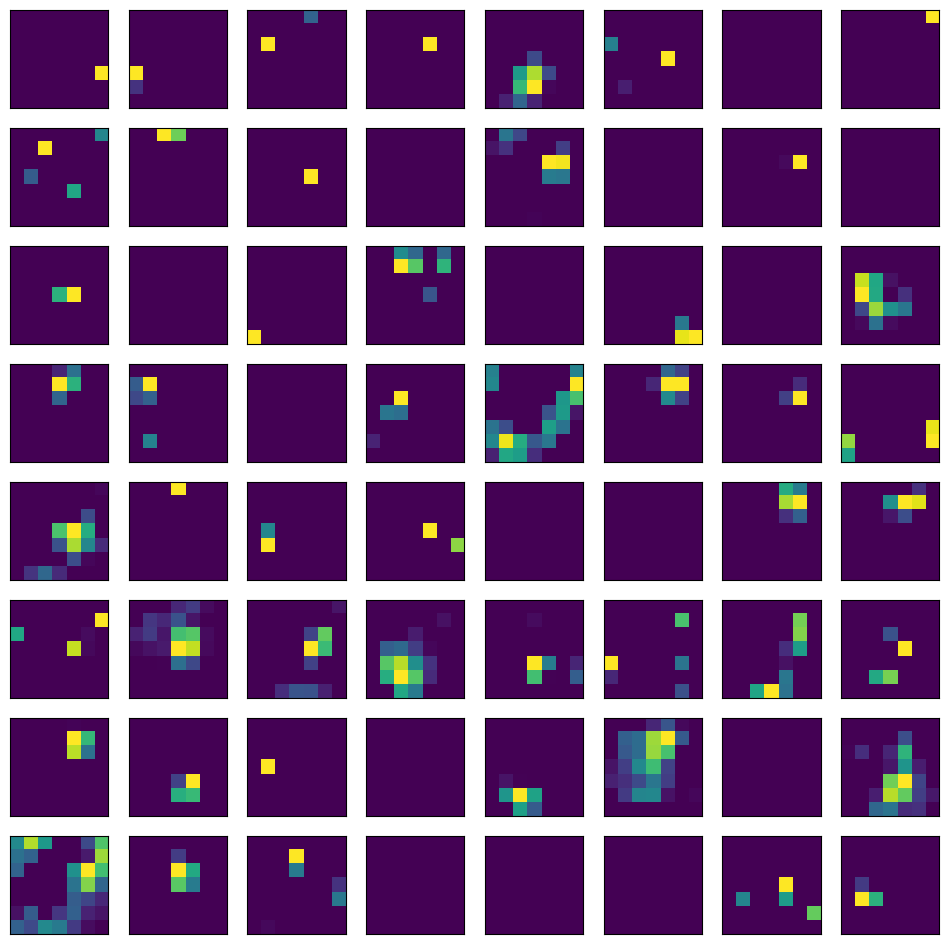

In [17]:
import matplotlib.pyplot as plt

# feature 맵 가져오기
feature_maps = features[0]  # 첫 번째 이미지의 특징 맵
num_features = feature_maps.shape[2]  # feature 맵의 수

# 시각화할 feature 맵 수
num_features_to_visualize = 64  # 처음 16개의 feature 맵 시각화

# feature 맵을 그리드 형태로 표시
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(12, 12))  # 4x4 그리드 설정
for i, ax in enumerate(axes.flat):
    if i < num_features_to_visualize:
        # feature 맵  선택
        fmap = feature_maps[:, :, i]

        # 선택된 feature 맵 시각화
        ax.imshow(fmap, cmap='viridis')
        ax.set_xticks([])  # x축 눈금 숨기기
        ax.set_yticks([])  # y축 눈금 숨기기
    else:
        ax.axis('off')  # 나머지 그래프 영역 비활성화

plt.show()


In [18]:
num_features

512

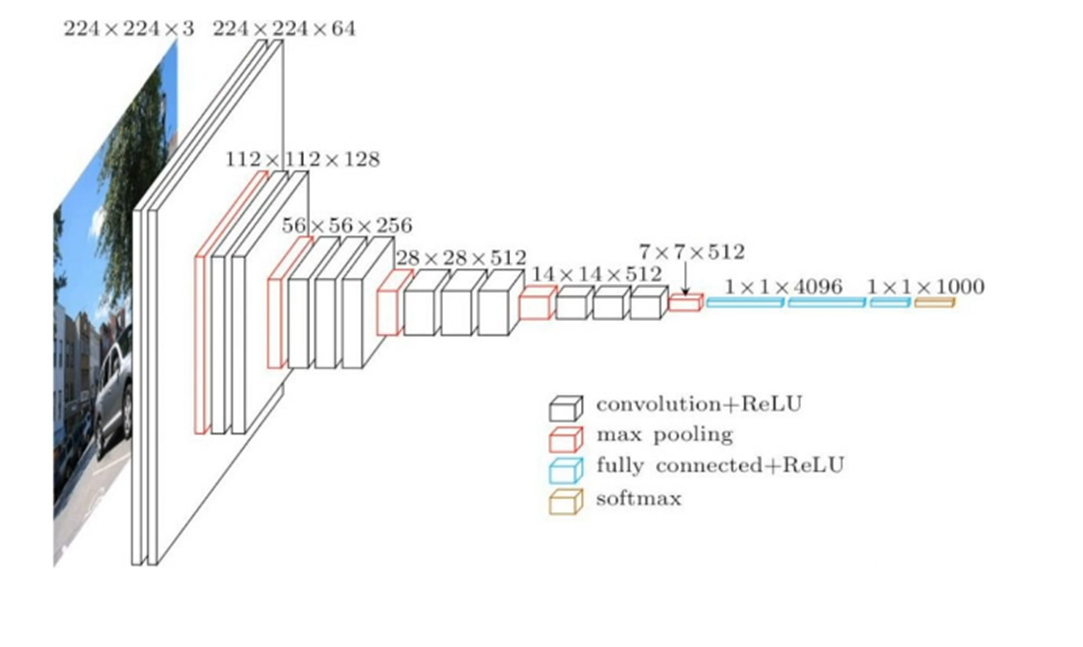